In [28]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1)

#### A:

32215170


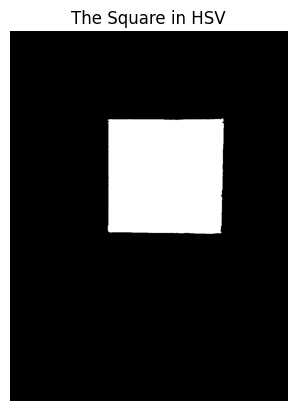

In [29]:
# Load images
img1 = cv2.imread('1.jpg')
hsv_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# Set range for green color in HSV
lower_green = np.array([36, 25, 25])  
upper_green = np.array([90, 255, 255])  

# Create the mask
green_mask1 = cv2.inRange(hsv_img1, lower_green, upper_green)

# Plot the result
print(np.sum(green_mask1))
plt.title('The Square in HSV')
plt.axis('off')
plt.imshow(green_mask1, cmap='gray')
plt.show()

#### B:

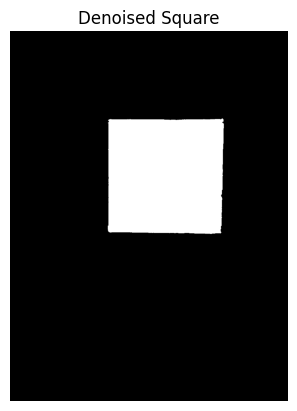

In [30]:
# Use Cross-shaped Kernel
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Use morphologyEx to denoise the green mask
denoised_mask1 = cv2.morphologyEx(
    green_mask1, cv2.MORPH_OPEN, kernel_cross)

plt.title('Denoised Square')
plt.axis('off')
plt.imshow(denoised_mask1, cmap='gray')
plt.show()

#### C:

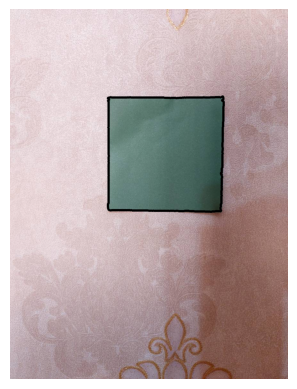

In [31]:
# Detect the contour
contour, _ = cv2.findContours(
    green_mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plot the contour of the square
contour_image = hsv_img1.copy()
cv2.drawContours(
    contour_image, contour, -1, (0, 255, 0), 5)

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

#### D:

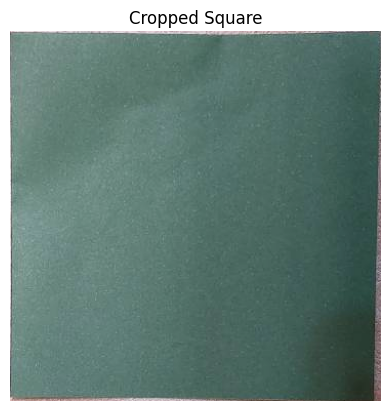

In [32]:
largest_contour = max(contour, key=cv2.contourArea)

# Bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the region
cropped_image = hsv_img1[y:y+h, x:x+w]

# Plot the separated green square
plt.title("Cropped Square")
plt.axis('off')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_HSV2RGB))
plt.show()

#### E:

In [33]:
# Rectangle fitting
rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect).astype(int)

# Get the W and H of the rectangle
width = int(rect[1][0])
height = int(rect[1][1])

# Get the center coordinates of the rectangle
(x,y) = (int(rect[0][0]), int(rect[0][1]))

print("Width of the contour:", width)
print("Height of the contour:", height)
print("Center of the contour:", (x, y))

Width of the contour: 360
Height of the contour: 361
Center of the contour: (485, 453)


#### F:

In [34]:
w = 20
width_of_square = 8
focal_length = width * (w/width_of_square)
print("Focal Length in Pixel:", focal_length)

Focal Length in Pixel: 900.0


#### G:

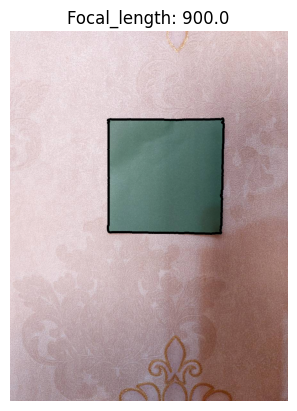

In [35]:
# Plot the contour
plt.title("Focal_length: {}".format(focal_length))
plt.axis('off')
plt.imshow(
    cv2.cvtColor(contour_image, cv2.COLOR_HSV2RGB))
plt.show()

## 2)

#### A:

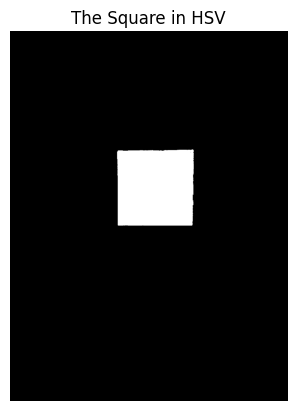

In [36]:
# Load images
img2 = cv2.imread('2.jpg')
hsv_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# Set range for green color in HSV
lower_green = np.array([36, 25, 25])  
upper_green = np.array([90, 255, 255])  

# Create a mask
green_mask2 = cv2.inRange(hsv_img2, lower_green, upper_green)

# Plot  the result
plt.title('The Square in HSV')
plt.axis('off')
plt.imshow(green_mask2, cmap='gray')
plt.show()

#### B:

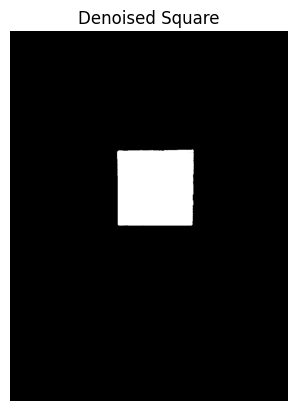

In [37]:
# Use Cross-shaped Kernel
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
# Denoise the green mask image
denoised_mask2 = cv2.morphologyEx(
    green_mask2, cv2.MORPH_OPEN, kernel_cross)

# Plot the result
plt.title('Denoised Square')
plt.axis('off')
plt.imshow(denoised_mask2, cmap='gray')
plt.show()

#### C:

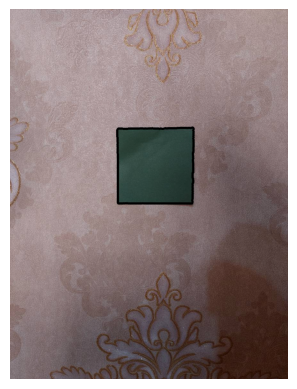

In [38]:
# Detect the contour
contour2, _ = cv2.findContours(
    green_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plot the contour of the square
contour_image2 = hsv_img2.copy()
cv2.drawContours(
    contour_image2, contour2, -1, (0, 255, 0), 5)

plt.imshow(cv2.cvtColor(contour_image2, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

#### D:

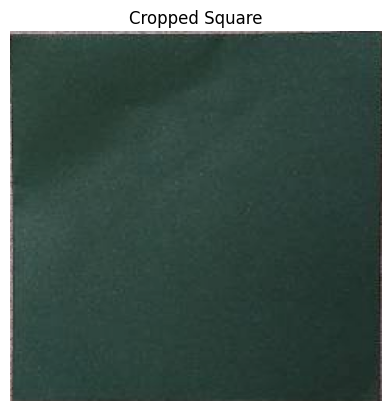

In [39]:
largest_contour2 = max(contour2, key=cv2.contourArea)

# Bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour2)

# Crop the region
cropped_image2 = hsv_img2[y:y+h, x:x+w]

# Plot the separated the square
plt.title("Cropped Square")
plt.imshow(cv2.cvtColor(cropped_image2, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

#### E:

In [40]:
# Rectangle fitting
rect2 = cv2.minAreaRect(largest_contour2)
box2 = cv2.boxPoints(rect2).astype(int)

# Get the W and H of the rectangle
width2 = int(rect2[1][0])
height2 = int(rect2[1][1])

# Get the center coordinates of the rectangle
(x,y) = (int(rect2[0][0]), int(rect2[0][1]))

print("Width of the contour:", width2)
print("Height of the contour:", height2)
print("Center of the contour:", (x,y))

Width of the contour: 237
Height of the contour: 236
Center of the contour: (452, 488)


#### Compute w2

In [41]:
# Focal length is 900px
w2 = focal_length * (width_of_square/width2)
print("The distance between camera and green square object:", w2)
print("The focal length in pixel:", focal_length)

The distance between camera and green square object: 30.379746835443036
The focal length in pixel: 900.0


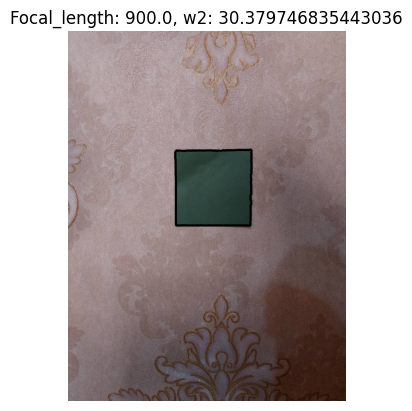

In [42]:
# Again display the contour of the first image)
plt.title(f'Focal_length: {focal_length}, w2: {w2}')
plt.imshow(cv2.cvtColor(contour_image2, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

## 3 & 4)

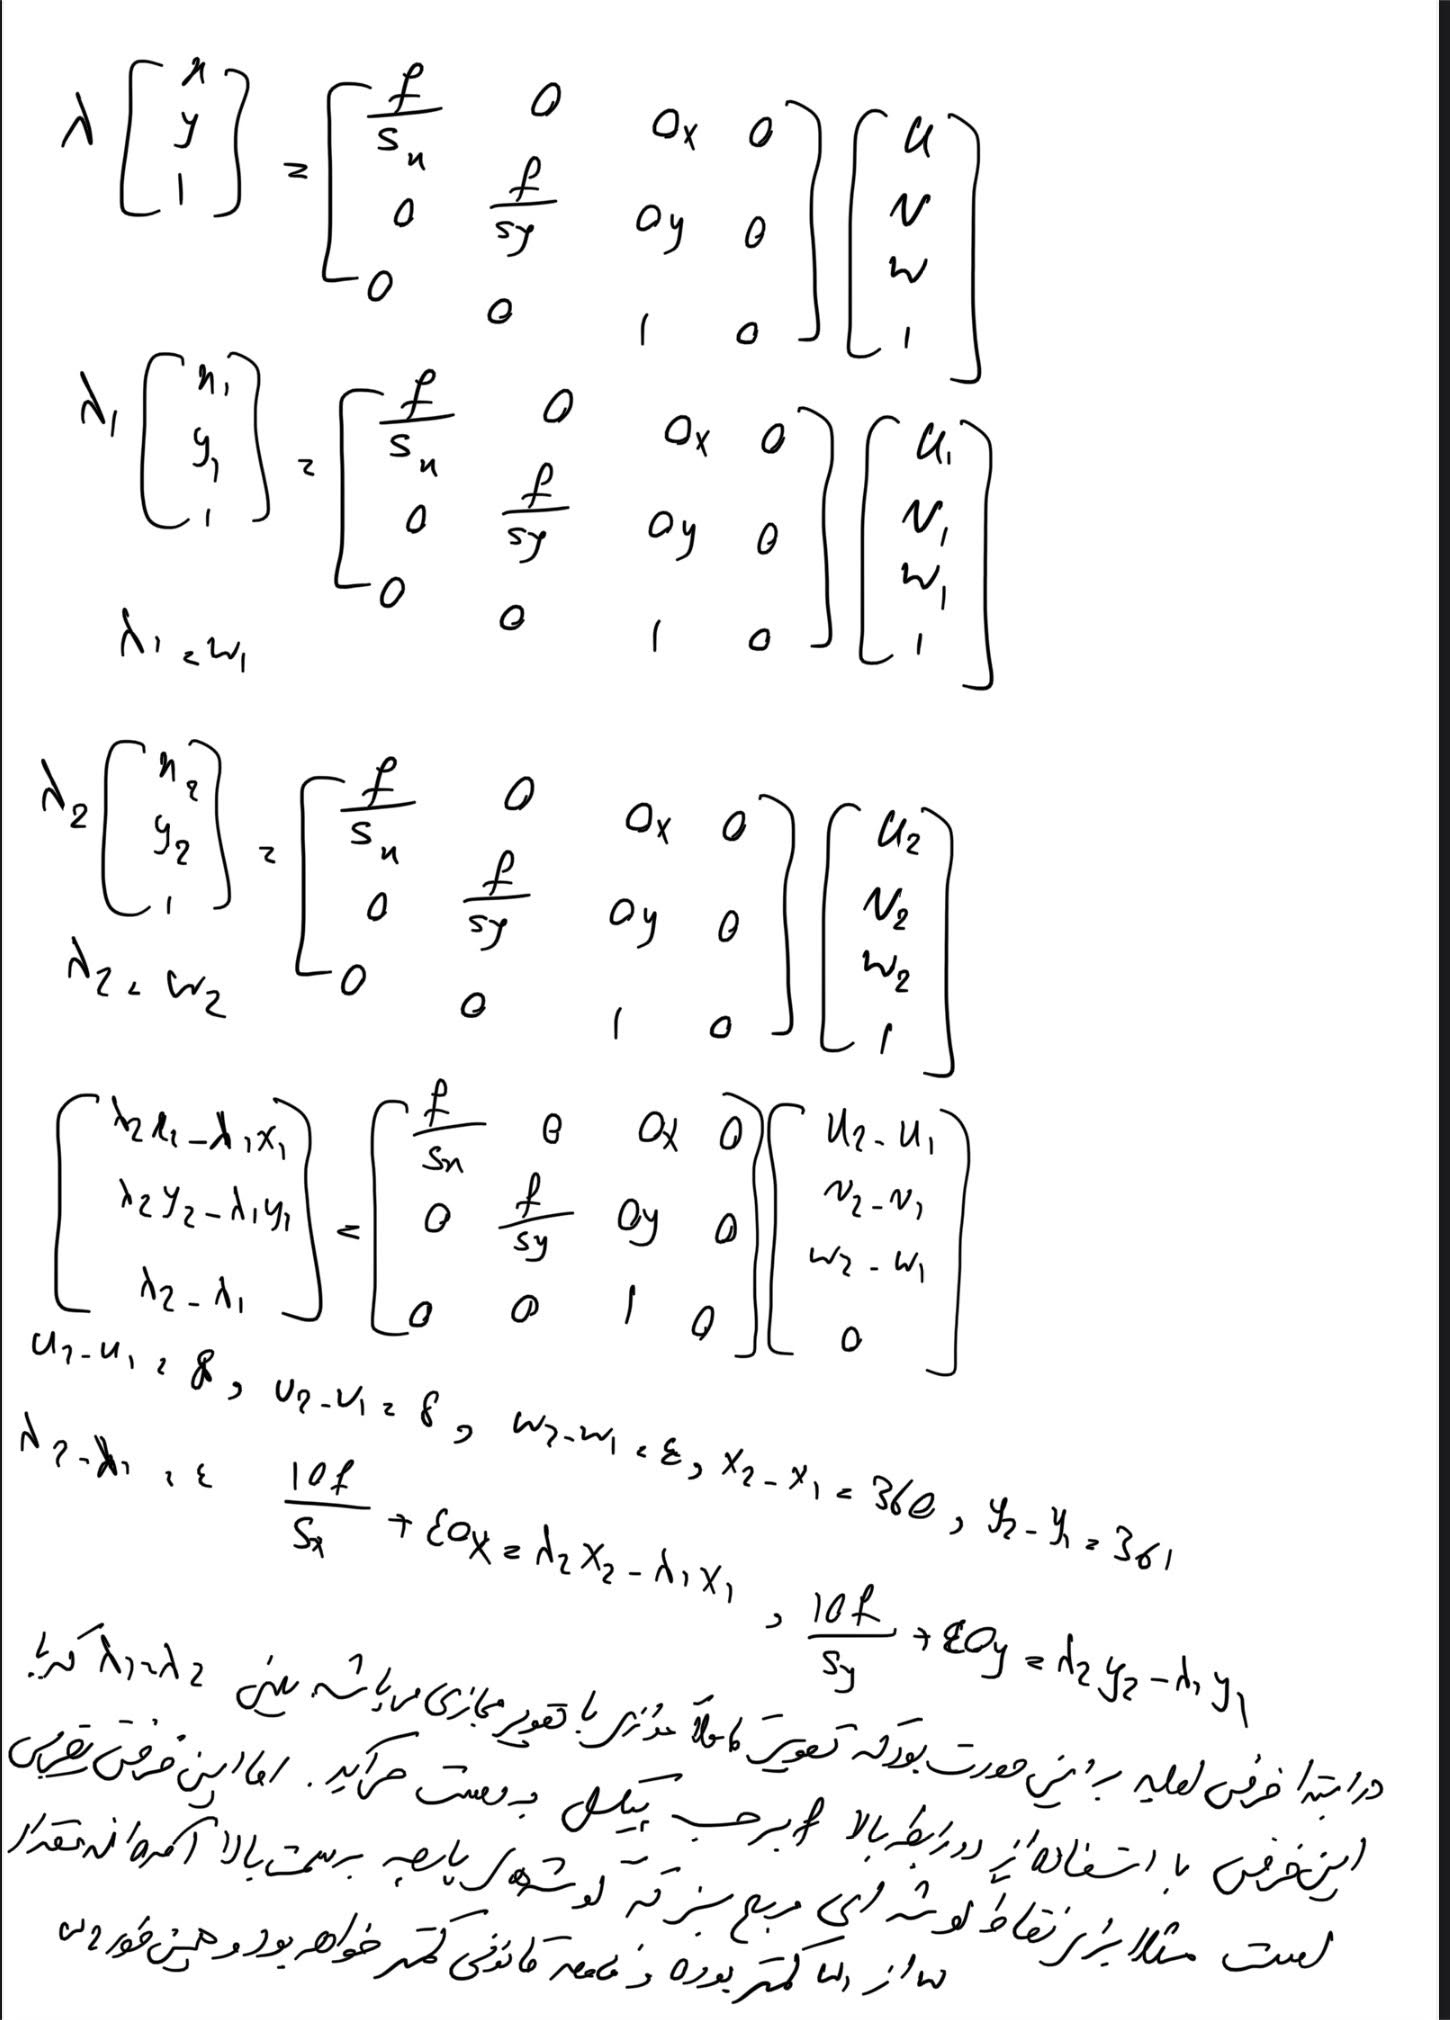